# Matching

In [9]:
import os
import cv2

import matplotlib.pyplot as plt

## Processed images

In [10]:
im1 = cv2.imread('../data/cropped/processed/mc.bmp')
im2 = cv2.imread('../data/cropped/processed/sg.bmp')

In [11]:
print(f'Shapes: {im1.shape}, {im2.shape}')

Shapes: (1038, 706, 3), (1078, 1044, 3)


In [12]:
# extract features
sift = cv2.SIFT_create()

kp1, desc1 = sift.detectAndCompute(im1, None)
kp2, desc2 = sift.detectAndCompute(im2, None)

# detect matches
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2)

# apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# get a score
score = len(good)/(min(len(kp1), len(kp2)))
print(f'Score (% of matching keypoints): {score:.2%}')

Score (% of matching keypoints): 0.19%


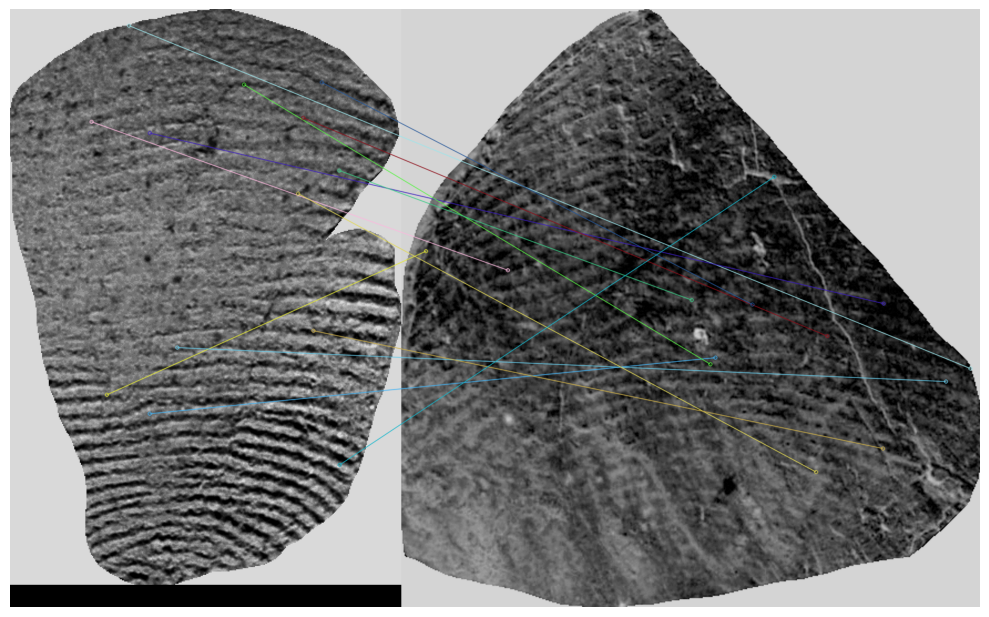

In [13]:
# draw output
fig = plt.figure(figsize=(10, 10))
out = cv2.drawMatchesKnn(im1, kp1, im2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(out)
plt.axis('off')
fig.tight_layout()

## Enhanced images

In [14]:
im1 = cv2.imread('../data/cropped/enhanced/mc.bmp')
im2 = cv2.imread('../data/cropped/enhanced/sg.bmp')

In [15]:
# extract features
sift = cv2.SIFT_create()

kp1, desc1 = sift.detectAndCompute(im1, None)
kp2, desc2 = sift.detectAndCompute(im2, None)

# detect matches
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2)

# apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# get a score
score = len(good)/(min(len(kp1), len(kp2)))
print(f'Score (% of matching keypoints): {score:.2%}')

Score (% of matching keypoints): 1.71%


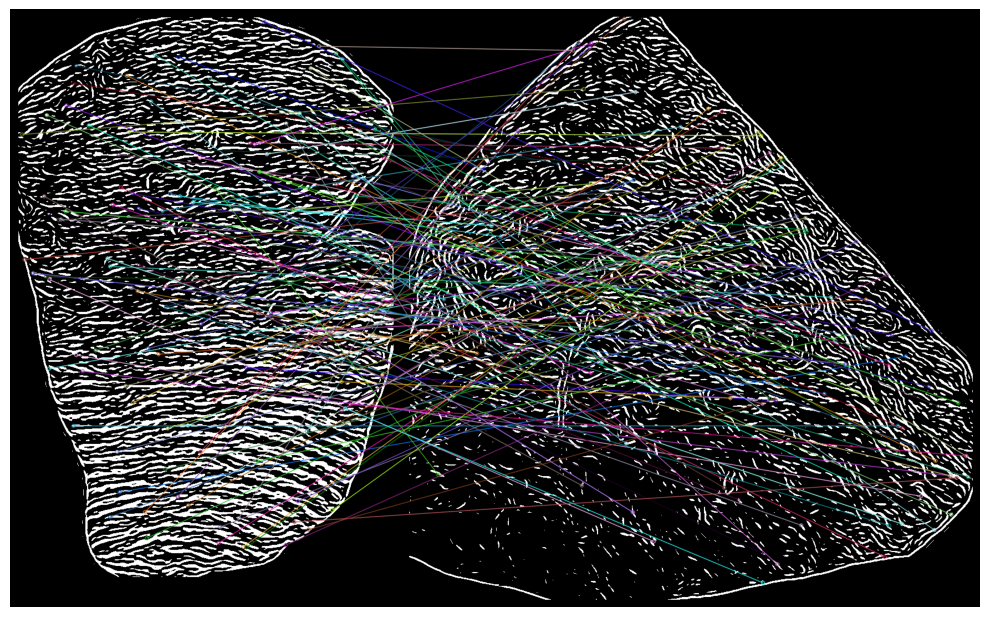

In [16]:
# draw output
fig = plt.figure(figsize=(10, 10))
out = cv2.drawMatchesKnn(im1, kp1, im2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(out)
plt.axis('off')
fig.tight_layout()